<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/66_Day_AdaBoost_Algo_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1581]:
df=pd.DataFrame()

In [1582]:
df['x1']=[1,4,2,5,2,5,6,1,7,9]

In [1583]:
df['x2']=[3,2,5,1,6,5,1,7,6,9]

In [1584]:
df['y']=[1,0,0,1,0,1,0,0,1,1]

# 1. weight assign

In [1585]:
# add weights
wt=1/df.shape[0]
df['wt']=[wt]*df.shape[0]

In [1586]:
df

,x1,x2,y,wt
0,1,3,1,0.1
1,4,2,0,0.1
2,2,5,0,0.1
3,5,1,1,0.1
4,2,6,0,0.1
5,5,5,1,0.1
6,6,1,0,0.1
7,1,7,0,0.1
8,7,6,1,0.1
9,9,9,1,0.1


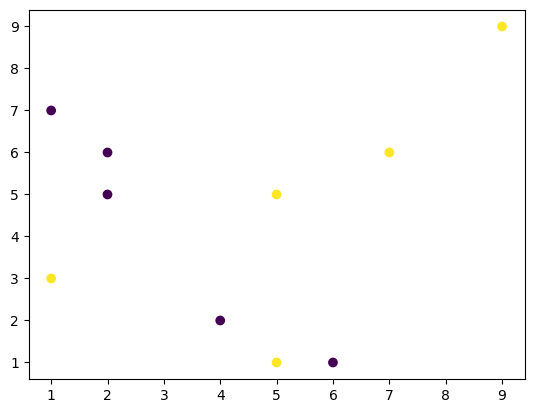

In [1587]:
plt.scatter(df['x1'],df['x2'],c=df['y'])

In [1588]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)
dt1.fit(df[['x1','x2']],df['y'])


DecisionTreeClassifier(max_depth=1)

<Axes: >

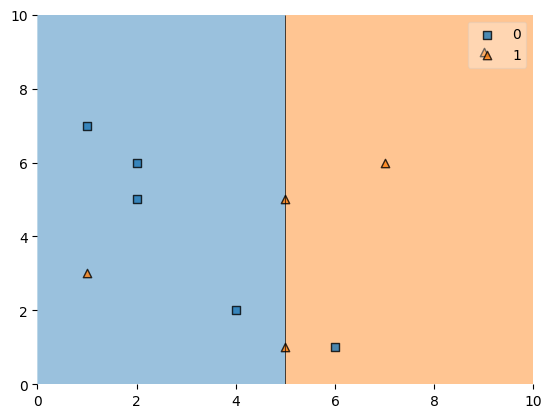

In [1589]:
# decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(df[['x1','x2']].values,df['y'].values,dt1)

# 2. calculate error

In [1590]:
# y_pred
df['y_pred']=dt1.predict(df[['x1','x2']])
df

,x1,x2,y,wt,y_pred
0,1,3,1,0.1,0
1,4,2,0,0.1,0
2,2,5,0,0.1,0
3,5,1,1,0.1,1
4,2,6,0,0.1,0
5,5,5,1,0.1,1
6,6,1,0,0.1,1
7,1,7,0,0.1,0
8,7,6,1,0.1,1
9,9,9,1,0.1,1


In [1591]:
df['error']=df['y']!=df['y_pred']
df

,x1,x2,y,wt,y_pred,error
0,1,3,1,0.1,0,True
1,4,2,0,0.1,0,False
2,2,5,0,0.1,0,False
3,5,1,1,0.1,1,False
4,2,6,0,0.1,0,False
5,5,5,1,0.1,1,False
6,6,1,0,0.1,1,True
7,1,7,0,0.1,0,False
8,7,6,1,0.1,1,False
9,9,9,1,0.1,1,False


In [1592]:
# caluclate error

def error(df):
    return df[df['error']==True]['wt'].sum()

# 3. calculate Alpha

In [1593]:
def alpha(df,error):
    return 0.5*np.log((1-error)/(error+0.00000001))

# 4. update weights

In [1594]:
error_1=error(df)
error_1

np.float64(0.2)

In [1595]:
alpha_1=alpha(df,error_1)
alpha_1

np.float64(0.693147155559946)

In [1596]:
np.exp(alpha_1)

np.float64(1.999999950000002)

In [1597]:
np.exp(-alpha_1)

np.float64(0.5000000124999998)

In [1598]:
df['wt_update']=df['wt']*np.exp(np.where(df['error']==True,alpha_1,-alpha_1))
df

,x1,x2,y,wt,y_pred,error,wt_update
0,1,3,1,0.1,0,True,0.20
1,4,2,0,0.1,0,False,0.05
2,2,5,0,0.1,0,False,0.05
3,5,1,1,0.1,1,False,0.05
4,2,6,0,0.1,0,False,0.05
5,5,5,1,0.1,1,False,0.05
6,6,1,0,0.1,1,True,0.20
7,1,7,0,0.1,0,False,0.05
8,7,6,1,0.1,1,False,0.05
9,9,9,1,0.1,1,False,0.05


In [1599]:
# sum of wt_update
df['wt_update'].sum() # sum of weight must be 1

np.float64(0.8000000000000003)

In [1600]:
# normalised
df['wt_normalised']=df['wt_update']/df['wt_update'].sum()
df

,x1,x2,y,wt,y_pred,error,wt_update,wt_normalised
0,1,3,1,0.1,0,True,0.20,0.2500
1,4,2,0,0.1,0,False,0.05,0.0625
2,2,5,0,0.1,0,False,0.05,0.0625
3,5,1,1,0.1,1,False,0.05,0.0625
4,2,6,0,0.1,0,False,0.05,0.0625
5,5,5,1,0.1,1,False,0.05,0.0625
6,6,1,0,0.1,1,True,0.20,0.2500
7,1,7,0,0.1,0,False,0.05,0.0625
8,7,6,1,0.1,1,False,0.05,0.0625
9,9,9,1,0.1,1,False,0.05,0.0625


In [1601]:
df['wt_normalised'].sum()

np.float64(0.9999999999999998)

# 4. Range

In [1602]:
df['cum_sum_upper']=np.cumsum(df['wt_normalised'])
df['cum_sum_lower']=df['cum_sum_upper']-df['wt_normalised']
df

,x1,x2,y,wt,y_pred,error,wt_update,wt_normalised,cum_sum_upper,cum_sum_lower
0,1,3,1,0.1,0,True,0.20,0.2500,0.2500,0.0000
1,4,2,0,0.1,0,False,0.05,0.0625,0.3125,0.2500
2,2,5,0,0.1,0,False,0.05,0.0625,0.3750,0.3125
3,5,1,1,0.1,1,False,0.05,0.0625,0.4375,0.3750
4,2,6,0,0.1,0,False,0.05,0.0625,0.5000,0.4375
5,5,5,1,0.1,1,False,0.05,0.0625,0.5625,0.5000
6,6,1,0,0.1,1,True,0.20,0.2500,0.8125,0.5625
7,1,7,0,0.1,0,False,0.05,0.0625,0.8750,0.8125
8,7,6,1,0.1,1,False,0.05,0.0625,0.9375,0.8750
9,9,9,1,0.1,1,False,0.05,0.0625,1.0000,0.9375


In [1603]:
df=df[['x1','x2','y','y_pred','error','wt_update','wt_normalised','cum_sum_lower','cum_sum_upper']]
df

,x1,x2,y,y_pred,error,wt_update,wt_normalised,cum_sum_lower,cum_sum_upper
0,1,3,1,0,True,0.20,0.2500,0.0000,0.2500
1,4,2,0,0,False,0.05,0.0625,0.2500,0.3125
2,2,5,0,0,False,0.05,0.0625,0.3125,0.3750
3,5,1,1,1,False,0.05,0.0625,0.3750,0.4375
4,2,6,0,0,False,0.05,0.0625,0.4375,0.5000
5,5,5,1,1,False,0.05,0.0625,0.5000,0.5625
6,6,1,0,1,True,0.20,0.2500,0.5625,0.8125
7,1,7,0,0,False,0.05,0.0625,0.8125,0.8750
8,7,6,1,1,False,0.05,0.0625,0.8750,0.9375
9,9,9,1,1,False,0.05,0.0625,0.9375,1.0000


# 5. select Random row

In [1604]:
def new_row(n,df):
  arrayy=[]

  for i in range(n):
    a=np.random.rand()
    for index,row in df.iterrows():
      if row['cum_sum_lower']<=a<=row['cum_sum_upper']:
        arrayy.append(index)
  return arrayy


In [1605]:
second_step=new_row(df.shape[0],df)
second_step

[0, 6, 3, 0, 6, 9, 6, 6, 7, 3]

In [1606]:
second_df=df.iloc[second_step,[0,1,2,]]
second_df

,x1,x2,y
0,1,3,1
6,6,1,0
3,5,1,1
0,1,3,1
6,6,1,0
9,9,9,1
6,6,1,0
6,6,1,0
7,1,7,0
3,5,1,1


# 2 stamp

In [1607]:
df_2=second_df
df_2

,x1,x2,y
0,1,3,1
6,6,1,0
3,5,1,1
0,1,3,1
6,6,1,0
9,9,9,1
6,6,1,0
6,6,1,0
7,1,7,0
3,5,1,1


In [1608]:
dt2=DecisionTreeClassifier(max_depth=1)
dt2.fit(df_2[['x1','x2']],df_2['y'])

DecisionTreeClassifier(max_depth=1)

<Axes: >

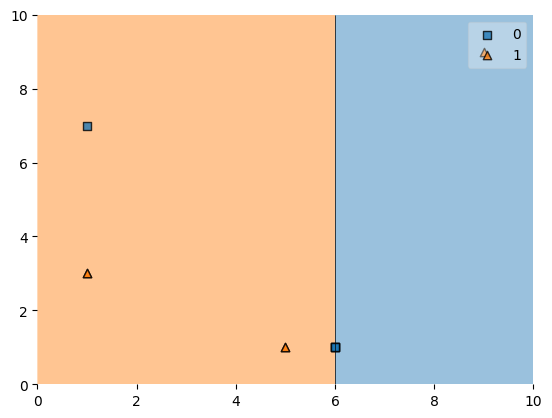

In [1609]:
plot_decision_regions(df_2[['x1','x2']].values,df_2['y'].values,dt2)

In [1610]:
df_2['y_pred']=dt2.predict(df_2[['x1','x2']])
df_2

,x1,x2,y,y_pred
0,1,3,1,1
6,6,1,0,0
3,5,1,1,1
0,1,3,1,1
6,6,1,0,0
9,9,9,1,0
6,6,1,0,0
6,6,1,0,0
7,1,7,0,1
3,5,1,1,1


In [1611]:
df_2['wt']=1/df_2.shape[0]
df_2

,x1,x2,y,y_pred,wt
0,1,3,1,1,0.1
6,6,1,0,0,0.1
3,5,1,1,1,0.1
0,1,3,1,1,0.1
6,6,1,0,0,0.1
9,9,9,1,0,0.1
6,6,1,0,0,0.1
6,6,1,0,0,0.1
7,1,7,0,1,0.1
3,5,1,1,1,0.1


In [1612]:
df_2['error']=df_2['y']!=df_2['y_pred']
error_2=error(df_2)
df_2

,x1,x2,y,y_pred,wt,error
0,1,3,1,1,0.1,False
6,6,1,0,0,0.1,False
3,5,1,1,1,0.1,False
0,1,3,1,1,0.1,False
6,6,1,0,0,0.1,False
9,9,9,1,0,0.1,True
6,6,1,0,0,0.1,False
6,6,1,0,0,0.1,False
7,1,7,0,1,0.1,True
3,5,1,1,1,0.1,False


In [1613]:
error_2

np.float64(0.2)

In [1614]:
alpha_2=alpha(df_2,error_2)
alpha_2

np.float64(0.693147155559946)

In [1615]:
df_2['wt_update']=df_2['wt']*np.exp(np.where(df_2['error']==True,alpha_1,-alpha_1))
df_2['wt_normalised']=df_2['wt_update']/df_2['wt_update'].sum()
df_2['cum_sum_upper']=np.cumsum(df_2['wt_normalised'])
df_2['cum_sum_lower']=df_2['cum_sum_upper']-df_2['wt_normalised']
df_2=df_2[['x1','x2','y','y_pred','error','wt_update','wt_normalised','cum_sum_lower','cum_sum_upper']]
df_2

,x1,x2,y,y_pred,error,wt_update,wt_normalised,cum_sum_lower,cum_sum_upper
0,1,3,1,1,False,0.05,0.0625,0.0000,0.0625
6,6,1,0,0,False,0.05,0.0625,0.0625,0.1250
3,5,1,1,1,False,0.05,0.0625,0.1250,0.1875
0,1,3,1,1,False,0.05,0.0625,0.1875,0.2500
6,6,1,0,0,False,0.05,0.0625,0.2500,0.3125
9,9,9,1,0,True,0.20,0.2500,0.3125,0.5625
6,6,1,0,0,False,0.05,0.0625,0.5625,0.6250
6,6,1,0,0,False,0.05,0.0625,0.6250,0.6875
7,1,7,0,1,True,0.20,0.2500,0.6875,0.9375
3,5,1,1,1,False,0.05,0.0625,0.9375,1.0000


In [1616]:
third=new_row(df.shape[0],df)
df_3=df.iloc[third,[0,1,2]]
df_3

,x1,x2,y
0,1,3,1
3,5,1,1
0,1,3,1
7,1,7,0
0,1,3,1
3,5,1,1
6,6,1,0
6,6,1,0
9,9,9,1
6,6,1,0


# 3 stamp

In [1617]:
dt3=DecisionTreeClassifier(max_depth=1)
dt3.fit(df_3[['x1','x2']],df_3['y'])
df_3['y_pred']=dt2.predict(df_3[['x1','x2']])
df_3['error']=df_3['y']!=df_3['y_pred']
df_3['wt']=1/df_3.shape[0]
df_3

,x1,x2,y,y_pred,error,wt
0,1,3,1,1,False,0.1
3,5,1,1,1,False,0.1
0,1,3,1,1,False,0.1
7,1,7,0,1,True,0.1
0,1,3,1,1,False,0.1
3,5,1,1,1,False,0.1
6,6,1,0,0,False,0.1
6,6,1,0,0,False,0.1
9,9,9,1,0,True,0.1
6,6,1,0,0,False,0.1


<Axes: >

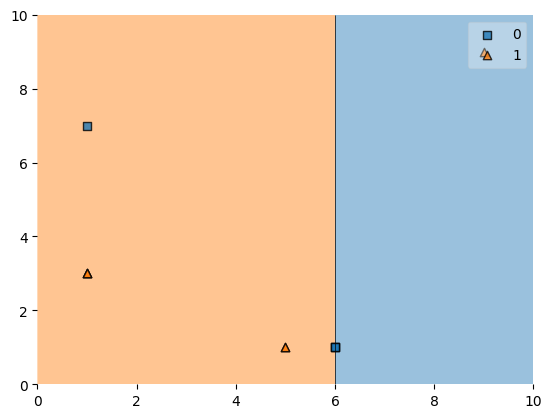

In [1618]:
plot_decision_regions(df_3[['x1','x2']].values,df_3['y'].values,dt3)

In [1619]:
error_3=error(df_3)
error_3
alpha_3=alpha(df_3,error_3)
alpha_3

np.float64(0.693147155559946)

In [1620]:
df_3['wt_update']=df_3['wt']*np.exp(np.where(df_3['error']==True,alpha_1,-alpha_1))
df_3['wt_normalised']=df_3['wt_update']/df_3['wt_update'].sum()
df_3['cum_sum_upper']=np.cumsum(df_3['wt_normalised'])
df_3['cum_sum_lower']=df_3['cum_sum_upper']-df_3['wt_normalised']
df_3=df_3[['x1','x2','y','y_pred','error','wt_update','wt_normalised','cum_sum_lower','cum_sum_upper']]
df_3

,x1,x2,y,y_pred,error,wt_update,wt_normalised,cum_sum_lower,cum_sum_upper
0,1,3,1,1,False,0.05,0.0625,0.0000,0.0625
3,5,1,1,1,False,0.05,0.0625,0.0625,0.1250
0,1,3,1,1,False,0.05,0.0625,0.1250,0.1875
7,1,7,0,1,True,0.20,0.2500,0.1875,0.4375
0,1,3,1,1,False,0.05,0.0625,0.4375,0.5000
3,5,1,1,1,False,0.05,0.0625,0.5000,0.5625
6,6,1,0,0,False,0.05,0.0625,0.5625,0.6250
6,6,1,0,0,False,0.05,0.0625,0.6250,0.6875
9,9,9,1,0,True,0.20,0.2500,0.6875,0.9375
6,6,1,0,0,False,0.05,0.0625,0.9375,1.0000


In [1621]:
new_row(df.shape[0],df_3)

[0, 3, 6, 9, 0, 7, 3, 0, 9, 0]

# prediction


In [1622]:
def pred(alpha_1,alpha_2,alpha_3,x1,x2):
     pred_1=dt1.predict([[x1,x2]])
     pred_2=dt2.predict([[x1,x2]])
     pred_3=dt3.predict([[x1,x2]])
     print("1= ",pred_1)
     print("2= ",pred_2)
     print("3= ",pred_3)

     return np.sign(pred_1*alpha_1+pred_2*alpha_2+pred_3*alpha_3)

In [1623]:
df.head()

,x1,x2,y,y_pred,error,wt_update,wt_normalised,cum_sum_lower,cum_sum_upper
0,1,3,1,0,True,0.20,0.2500,0.0000,0.2500
1,4,2,0,0,False,0.05,0.0625,0.2500,0.3125
2,2,5,0,0,False,0.05,0.0625,0.3125,0.3750
3,5,1,1,1,False,0.05,0.0625,0.3750,0.4375
4,2,6,0,0,False,0.05,0.0625,0.4375,0.5000


In [1625]:
pred(alpha_1,alpha_2,alpha_3,2,6)

1=  [0]
2=  [1]
3=  [1]


array([1.])